### Target = IPO + Unicorn Companies

In [1]:
#Importing required libraries
import os
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
import random
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Importing data
data = pd.read_excel('mydata_model_round2.xlsx')
#data = pd.read_excel('mydata_model_round3.xlsx')
print(data.shape)
data.head(2)

(1932, 29)


,d_success,Total Number of Rounds,Total Amount Raised ($M),Unique Amount Raised ($M),Meta Category,Highest Amount Raised ($M),Years in operation,Angel_round,Convertible Note_round,Continent,Largest Funding Round,Total Number of Investors,Last Round,Corporate Round_round,Debt Financing_round,Equity Crowdfunding_round,Grant_round,Initial Coin Offering_round,Late Stage_round,Non Equity Assistance_round,Pre Seed_round,Private Equity_round,Product Crowdfunding_round,Secondary Market_round,Seed_round,Series A_round,Series B_round,Series C_round,Venture_round
0,0,2,267.152423,267.152423,Deposits and Lending,159.356632,5,0,0,Asia,Series C,6,Series C,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,2,158.731418,158.731418,Deposits and Lending,158.731418,15,0,0,Europe,Debt Financing,2,Debt,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

##### Imputing missing values

In [3]:
#Imputing the missing value in the variable 'Last Round'
data['Last Round'].fillna('Data NA', inplace=True)

In [4]:
data.isnull().sum()

d_success                      0
Total Number of Rounds         0
Total Amount Raised ($M)       0
Unique Amount Raised ($M)      0
Meta Category                  0
Highest Amount Raised ($M)     0
Years in operation             0
Angel_round                    0
Convertible Note_round         0
Continent                      0
Largest Funding Round          0
Total Number of Investors      0
Last Round                     0
Corporate Round_round          0
Debt Financing_round           0
Equity Crowdfunding_round      0
Grant_round                    0
Initial Coin Offering_round    0
Late Stage_round               0
Non Equity Assistance_round    0
Pre Seed_round                 0
Private Equity_round           0
Product Crowdfunding_round     0
Secondary Market_round         0
Seed_round                     0
Series A_round                 0
Series B_round                 0
Series C_round                 0
Venture_round                  0
dtype: int64

In [5]:
print(data['d_success'].value_counts())
print("\n")

suc=len(data[data['d_success']==1])
fail=len(data[data['d_success']==0])
tot=suc+fail

print("% of success {}%".format(round(suc/tot*100,2)))
print("% of failure {}%".format(round(fail/tot*100,2)))

0    1867
1      65
Name: d_success, dtype: int64


% of success 3.36%
% of failure 96.64%


In [ ]:
data.dtypes

#### Create dummy variables

In [6]:
cat_vars = data.select_dtypes(include=['object']).columns.tolist()
#cat_vars.remove('Company')
cat_vars

['Meta Category', 'Continent', 'Largest Funding Round', 'Last Round']

In [7]:
#Creating dummies for categorical variables
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [ ]:
print(data.shape)
data.head()

In [8]:
#Dropping the original categorical variables after creating the dummies
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep

['d_success',
 'Total Number of Rounds',
 'Total Amount Raised ($M)',
 'Unique Amount Raised ($M)',
 'Highest Amount Raised ($M)',
 'Years in operation',
 'Angel_round',
 'Convertible Note_round',
 'Total Number of Investors',
 'Corporate Round_round',
 'Debt Financing_round',
 'Equity Crowdfunding_round',
 'Grant_round',
 'Initial Coin Offering_round',
 'Late Stage_round',
 'Non Equity Assistance_round',
 'Pre Seed_round',
 'Private Equity_round',
 'Product Crowdfunding_round',
 'Secondary Market_round',
 'Seed_round',
 'Series A_round',
 'Series B_round',
 'Series C_round',
 'Venture_round',
 'Meta Category_Banking Operations',
 'Meta Category_Capital Raising',
 'Meta Category_Deposits and Lending',
 'Meta Category_Financial Management',
 'Meta Category_Payments',
 'Continent_Africa',
 'Continent_Asia',
 'Continent_Australia/New Zealand',
 'Continent_Data unavailable',
 'Continent_Europe',
 'Continent_North America',
 'Continent_South America',
 'Largest Funding Round_Angel',
 'Large

In [9]:
#Final data columns
data_final=data[to_keep]
data_final.columns.values

array(['d_success', 'Total Number of Rounds', 'Total Amount Raised ($M)',
       'Unique Amount Raised ($M)', 'Highest Amount Raised ($M)',
       'Years in operation', 'Angel_round', 'Convertible Note_round',
       'Total Number of Investors', 'Corporate Round_round',
       'Debt Financing_round', 'Equity Crowdfunding_round', 'Grant_round',
       'Initial Coin Offering_round', 'Late Stage_round',
       'Non Equity Assistance_round', 'Pre Seed_round',
       'Private Equity_round', 'Product Crowdfunding_round',
       'Secondary Market_round', 'Seed_round', 'Series A_round',
       'Series B_round', 'Series C_round', 'Venture_round',
       'Meta Category_Banking Operations',
       'Meta Category_Capital Raising',
       'Meta Category_Deposits and Lending',
       'Meta Category_Financial Management', 'Meta Category_Payments',
       'Continent_Africa', 'Continent_Asia',
       'Continent_Australia/New Zealand', 'Continent_Data unavailable',
       'Continent_Europe', 'Continent_

In [10]:
# Dropping 'Largest Funding Round_Undisclosed' and 'Last Round_Data NA'
data_final = data_final.drop(['Largest Funding Round_Undisclosed','Last Round_Data NA',
                              'Continent_Data unavailable'], axis=1)
data_final.shape

(1932, 71)

In [ ]:
list(data_final.columns)

In [11]:
#keeping only the required variables
final_vars = ['d_success', 'Years in operation', 'Total Amount Raised ($M)', 'Total Number of Investors',
              'Highest Amount Raised ($M)', 'Late Stage_round',  'Total Number of Rounds', 'Last Round_PE',
              'Venture_round', 'Series A_round', 'Series B_round', 'Series C_round',  'Last Round_Debt']
data_final = data_final[final_vars]
data_final.shape

(1932, 13)

In [12]:
#Separating predictors and target variable
predictors=data_final.drop('d_success', axis=1)
target=data_final[['d_success']]

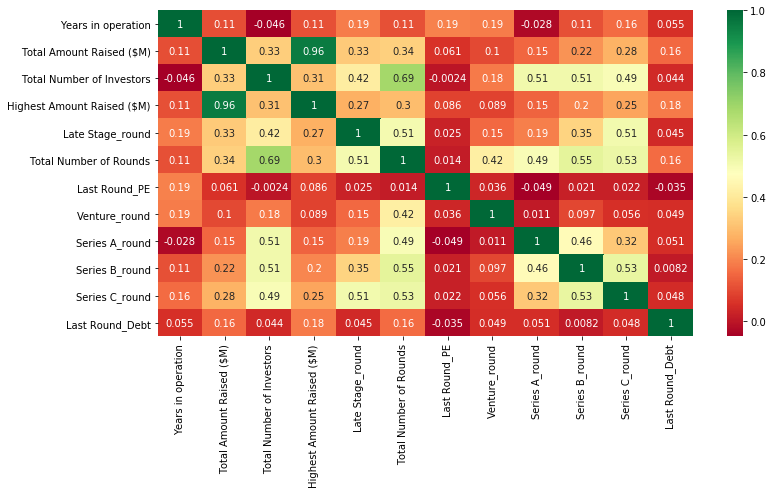

In [18]:
# # Correlation with original predictors value

# #Features suggested by Logistics Regression
# selected_features = ['Years in operation', 'Post Ipo Debt_round', 'Post Ipo Equity_round', 'Series A_round',
#                      'Series B_round', 'Venture_round', 'Post Ipo Debt_days', 'Seed_days', 'Series A_days',
#                      'Series B_days', 'Series C_days', 'Venture_days', 'Meta Category_Deposits and Lending',
#                      'Last Round_PE', 'Largest Funding Round_Late Stage', 'Largest Funding Round_Post Ipo Debt',
#                      'Largest Funding Round_Private Equity', 'Largest Funding Round_Series C']

# data_X = data_final[selected_features]

# plt.rcParams['figure.figsize']=12,6
plt.figure(figsize=(12, 6))
sns_plot = sns.heatmap(predictors.corr(), annot=True, cmap="RdYlGn")
plt.show()
sns_plot.figure.savefig('cor.png')
# fig.savefig('cor')

In [19]:
predictors.drop('Highest Amount Raised ($M)', axis=1, inplace=True)

In [ ]:
# # Pick only numeric variables to rescale
# predictors_num = predictors[list(set(pd.Series(['Total Number of Rounds', 'Total Amount Raised ($M)', 'Unique Amount Raised ($M)',
#                      'Highest Amount Raised ($M)', 'Years in operation'])))]
# predictors_non_num = predictors[list(set(predictors.columns)-set(predictors_num))]
# print(predictors_num.shape, predictors_non_num.shape)

### Rescaling the data as the variables are on different scale

1. If we try to apply distance based methods such as kNN on these features, feature with the largest range will dominate the outcome results and we’ll obtain less accurate predictions. We can overcome this trouble using feature scaling.
2. It should be kept in mind while performing distance based methods we must attempt to scale the data, so that the feature with lesser significance might not end up dominating the objective function due to its larger range. In addition, features having different unit should also be scaled thus providing each feature equal initial weightage and at the end we will have a better prediction model.

In [20]:
# MinMaxScaler that will scale down all the features between 0 and 1.

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

# predictors_num_rescaled = pd.DataFrame(min_max.fit_transform(predictors_num), columns=predictors_num.columns)
# X_rescaled = predictors_num_rescaled.join(predictors_non_num)

X_rescaled = pd.DataFrame(min_max.fit_transform(predictors), columns=predictors.columns)
# X_rescaled

### Feature Standardization

1. In logistic regression, each feature is assigned a weight or coefficient (Wi). If there is a feature with relatively large range and it is insignificant in the objective function then logistic regression will itself assign a very low value to its co-efficient, thus neutralizing the dominant effect of that particular feature, whereas distance based method such as kNN does not have this inbuilt strategy, thus it requires scaling.
2. Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean.
3. Elements such as l1 ,l2 regularizer in linear models (logistic comes under this category) and RBF kernel in SVM in objective function of learners assumes that all the features are centered around zero and have variance in the same order.
4. Standardizing the data when using a estimator having l1 or l2 regularization helps us to increase the accuracy of the prediction model. Other learners like kNN with euclidean distance measure, k-means, SVM, perceptron, neural networks, linear discriminant analysis, principal component analysis may perform better with standardized data.

In [21]:
# Standardizing the data

from sklearn.preprocessing import scale

# predictors_num_std = pd.DataFrame(scale(predictors_num), columns=predictors_num.columns)
# X_standardized = predictors_num_std.join(predictors_non_num)

X_standardized = pd.DataFrame(scale(predictors), columns=predictors.columns)
# X_standardized

### 2. Over-sampling using SMOTE

###### At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (Non-IPO) instead of creating copies.
2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [22]:
import warnings
warnings.filterwarnings("ignore")

# X1 = data_final.loc[:, data_final.columns != 'd_success']
# y1 = data_final.loc[:, data_final.columns == 'd_success']

#### Select X1 based on the required; y1 will be common for any X1 ###
# X1=predictors
# X1=X_standardized
X1=X_rescaled
y1=target

os = SMOTE(k_neighbors=5, random_state=999) # we can use different values of k

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=999)

columns = X_train1.columns
os_data_X,os_data_y=os.fit_sample(X_train1, y_train1)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['d_success'])

# we can Check the numbers of our data
print("length of original data is: ",len(X_train1))
print("Number of Non-IPO in oversampled data: ",len(y_train1[y_train1['d_success']==0]))
print("Number of IPO data in oversampled data: ",len(y_train1[y_train1['d_success']==1]))
print("Proportion of Non-IPO data in original data is: ",round(len(y_train1[y_train1['d_success']==0])/len(X_train1),2))
print("Proportion of IPO data in original data is: ",round(len(y_train1[y_train1['d_success']==1])/len(X_train1),2))

print("\n")

print("length of oversampled data is: ",len(os_data_X))
print("Number of Non-IPO in oversampled data: ",len(os_data_y[os_data_y['d_success']==0]))
print("Number of IPO data in oversampled data: ",len(os_data_y[os_data_y['d_success']==1]))
print("Proportion of Non-IPO data in oversampled data is: ",len(os_data_y[os_data_y['d_success']==0])/len(os_data_X))
print("Proportion of IPO data in oversampled data is: ",len(os_data_y[os_data_y['d_success']==1])/len(os_data_X))

length of original data is:  1352
Number of Non-IPO in oversampled data:  1305
Number of IPO data in oversampled data:  47
Proportion of Non-IPO data in original data is:  0.97
Proportion of IPO data in original data is:  0.03


length of oversampled data is:  2610
Number of Non-IPO in oversampled data:  1305
Number of IPO data in oversampled data:  1305
Proportion of Non-IPO data in oversampled data is:  0.5
Proportion of IPO data in oversampled data is:  0.5


### GridSearchCV evaluating using multiple scorers simultaneously

Result on Rescaled data
best params: LogisticRegression(C=1.6000100000000002, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=999,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 1.6000100000000002}
best score: 0.9684265010351967


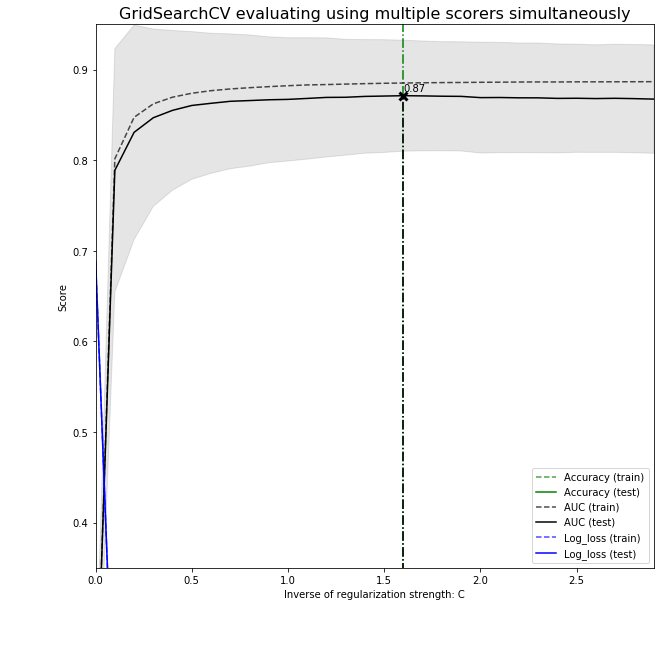

Result on oversampled data
best params: LogisticRegression(C=2.8000100000000003, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=999,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 2.8000100000000003}
best score: 0.810727969348659


In [23]:
from sklearn.model_selection import GridSearchCV

# X = data_final[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(random_state=999), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

# gs.fit(predictors, target)
# gs.fit(X_standardized, target)
gs.fit(X_rescaled, target)

#### Result on Rescaled data

print("Result on Rescaled data")

results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

# #### Result on oversampled data

print("Result on oversampled data")

gs1 = GridSearchCV(LogisticRegression(random_state=999), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')
gs1.fit(os_data_X, os_data_y)

results = gs1.cv_results_

print('='*20)
print("best params: " + str(gs1.best_estimator_))
print("best params: " + str(gs1.best_params_))
print('best score:', gs1.best_score_)
print('='*20)

# Logistic Regression and Results

### 3. Review of model evaluation procedures

### Split the data into train and test

###### NOTE: Run the next next line of code only for the original and not the oversampled data models; otherwise skip the next line

In [70]:
#### Select X for splitting based on the requirement; y will be same for all

# X=X_standardized
X=X_rescaled
# X=predictors
y=target

# ## In case we want to run the model with few selected features based on RFE
# X=X_standardized[selected_features]
# X=X_rescaled[selected_features]
# X=predictors[selected_features]
# y=target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1352, 11) (1352, 1)
(580, 11) (580, 1)


###### Note: Run the next line of code only for the oversampled data models. For normal data models run the previous line of code

In [68]:
X_train = os_data_X
y_train = os_data_y
X_test = X_test1
y_test = y_test1

# ## In case we want to run the model with few selected features based on RFE
# X_train = os_data_X[selected_features]
# y_train = os_data_y
# X_test = X_test1[selected_features]
# y_test = y_test1

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2610, 11) (2610, 1)
(580, 11) (580, 1)


##### 3.1 Model evaluation based on simple train/test split

Result on train data:

LogisticRegression accuracy is 0.845
LogisticRegression log_loss is 0.431
LogisticRegression auc is 0.888


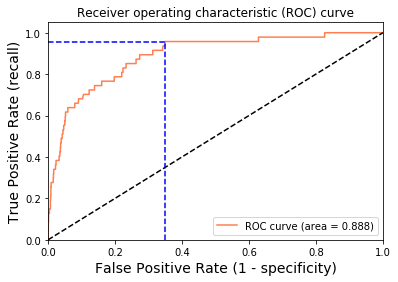

Result on validation/test data:

LogisticRegression accuracy is 0.860
LogisticRegression log_loss is 0.410
LogisticRegression auc is 0.898


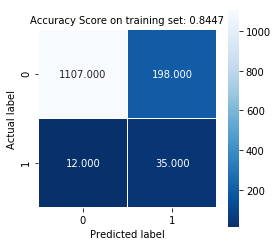

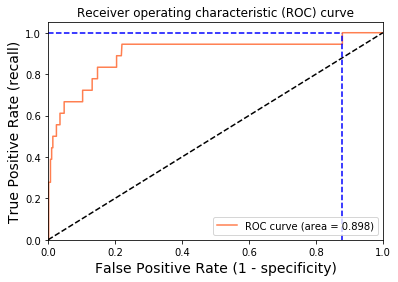

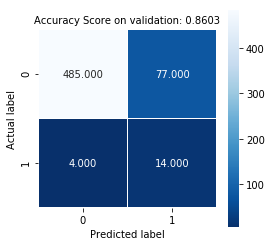

In [71]:
import random
random.seed(999)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# # create X (features) and y (response)
# X = data_final[Selected_features]
# y = data_final['d_success']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

# check classification scores of logistic regression
logreg = LogisticRegression(C=1.6000100000000002, class_weight='balanced') #C=1.6000100000000002
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

y_pred_proba_train = logreg.predict_proba(X_train)[:, 1]
y_pred_proba = logreg.predict_proba(X_test)[:, 1]


print('Result on train data:\n')
[fpr, tpr, thr] = roc_curve(y_train, y_pred_proba_train)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_train, y_pred_train))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_train, y_pred_proba_train))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix on train data
# print(logreg.__class__.__name__+" confusion matrix \n {}".format(confusion_matrix(y_train, y_pred_train)))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on training set: {0}'.format(round(accuracy_score(y_train, y_pred_train),4))
plt.title(all_sample_title, size = 10)


#################### Test/Validation ######################

print("Result on validation/test data:\n")
[fpr1, tpr1, thr1] = roc_curve(y_test, y_pred_proba)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr1, tpr1))

idx1 = np.min(np.where(tpr1 > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6,4))
plt.plot(fpr1, tpr1, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr1[idx1]], [tpr1[idx1],tpr1[idx1]], 'k--', color='blue')
plt.plot([fpr1[idx1],fpr1[idx1]], [0,tpr1[idx1]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix on test data
# print(logreg.__class__.__name__+" confusion matrix \n {}".format(confusion_matrix(y_test, y_pred)))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on validation: {0}'.format(round(accuracy_score(y_test, y_pred),4))
plt.title(all_sample_title, size = 10);


# print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
#       "and a specificity of %.3f" % (1-fpr[idx]) + 
#       ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

# #Optimal threshold
# optimal_idx = np.argmax(tpr - fpr)
# print("\nOptimal Threshold:%.3f" % thr[optimal_idx])

Final output: Logistic regression with oversampled values is giving better sensitivity 

In [26]:
logregFullData = LogisticRegression(C=1.6000100000000002, class_weight='balanced')
logregFullData.fit(X_rescaled, target)

LogisticRegression(C=1.6000100000000002, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [50]:
print("Predictors:{}".format(list(X_rescaled.columns)))
coeff = logregFullData.coef_
print("Intercept: {}".format(logregFullData.intercept_))
print("Coefficient: {}".format(logregFullData.coef_))

Predictors:['Years in operation', 'Total Amount Raised ($M)', 'Total Number of Investors', 'Late Stage_round', 'Total Number of Rounds', 'Last Round_PE', 'Venture_round', 'Series A_round', 'Series B_round', 'Series C_round', 'Last Round_Debt']
Intercept: [-2.81587325]
Coefficient: [[ 3.42673951  7.56355546  3.25462575  2.33728788  1.80120324  0.61098283
  -0.68065837 -0.77722338 -1.04918351  1.78431311  0.95936817]]


In [63]:
pred = logregFullData.predict(X_rescaled)

In [66]:
pred1 = pd.DataFrame({'predicted':pred})

In [67]:
pred1.to_excel('pred.xlsx')

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=999)

In [54]:
# GridSearchCV to fine tune the parameters
np.random.seed(999)
start = time.time()

param_dist = {'max_depth':[6, 7, 8, 9, 10,11,12,14,16, 17, 18],
              'bootstrap':[True, False],
              'max_features':['auto', 'sqrt', 'log2', None],              
              'min_samples_split': [2, 3, 4,5,6],
              'class_weight' : [None, 'balanced_subsample', 'balanced']
             }

cv_rf = GridSearchCV(forest, cv=10, param_grid=param_dist, n_jobs=-1)
# cv_rf.fit(os_data_X, os_data_y)
cv_rf.fit(X_train, y_train)
print('Best parameters using grid search: \n',
       cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end-start))

Best parameters using grid search: 
 {'bootstrap': True, 'class_weight': None, 'max_depth': 11, 'max_features': None, 'min_samples_split': 3}
Time taken in grid search:  210.58


Result on train data:

RandomForestClassifier accuracy is 0.995
RandomForestClassifier log_loss is 0.026
RandomForestClassifier auc is 0.998


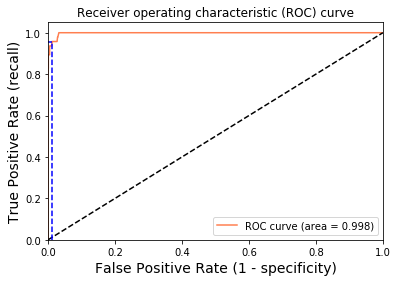

Result on validation/test data:

RandomForestClassifier accuracy is 0.959
RandomForestClassifier log_loss is 0.475
RandomForestClassifier auc is 0.790


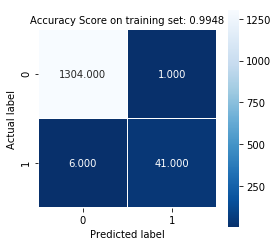

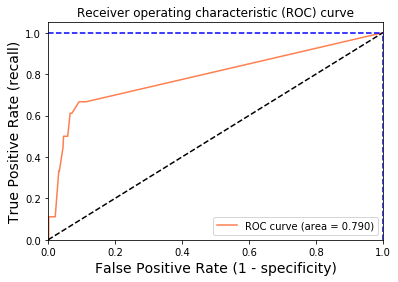

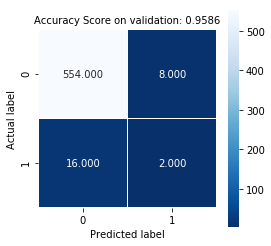

In [55]:
import random
random.seed(999)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# check classification scores of random forest
modelRF = forest.set_params(bootstrap=True, max_features=None, max_depth=11,
                            n_estimators='warn', min_samples_split=3)
modelRF.fit(X_train, y_train)

y_pred_train = modelRF.predict(X_train)
y_pred = modelRF.predict(X_test)

y_pred_proba_train = modelRF.predict_proba(X_train)[:, 1]
y_pred_proba = modelRF.predict_proba(X_test)[:, 1]


print('Result on train data:\n')
[fpr, tpr, thr] = roc_curve(y_train, y_pred_proba_train)
print(modelRF.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_train, y_pred_train))
print(modelRF.__class__.__name__+" log_loss is %2.3f" % log_loss(y_train, y_pred_proba_train))
print(modelRF.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix on train data
# print(logreg.__class__.__name__+" confusion matrix \n {}".format(confusion_matrix(y_train, y_pred_train)))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on training set: {0}'.format(round(accuracy_score(y_train, y_pred_train),4))
plt.title(all_sample_title, size = 10)


#################### Test/Validation ######################

print("Result on validation/test data:\n")
[fpr1, tpr1, thr1] = roc_curve(y_test, y_pred_proba)
print(modelRF.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(modelRF.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(modelRF.__class__.__name__+" auc is %2.3f" % auc(fpr1, tpr1))

idx1 = np.min(np.where(tpr1 > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6,4))
plt.plot(fpr1, tpr1, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr1[idx1]], [tpr1[idx1],tpr1[idx1]], 'k--', color='blue')
plt.plot([fpr1[idx1],fpr1[idx1]], [0,tpr1[idx1]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix on test data
# print(logreg.__class__.__name__+" confusion matrix \n {}".format(confusion_matrix(y_test, y_pred)))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on validation: {0}'.format(round(accuracy_score(y_test, y_pred),4))
plt.title(all_sample_title, size = 10);


# print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
#       "and a specificity of %.3f" % (1-fpr[idx]) + 
#       ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

# #Optimal threshold
# optimal_idx = np.argmax(tpr - fpr)
# print("\nOptimal Threshold:%.3f" % thr[optimal_idx])

In [ ]:
#Function to calculate the variable importance
features = X_train.columns
importances_rf = modelRF.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

def variable_importance(importance, indices):
    print("Feature ranking:")
    for f in range(len(features)):
        i = f
        print("%d. The feature '%s' has a Mean Decrease in Gini of %f" % (f + 1,features[indices[i]],importance[indices[f]]))
        
variable_importance(importances_rf, indices_rf)

In [ ]:
#Plot the variable importance
features = X_train.columns
importances_rf = modelRF.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.rcParams['figure.figsize']=10,20
plt.title('Feature Importances')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

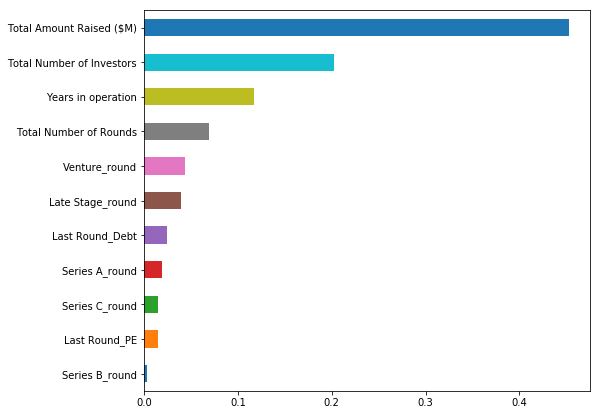

In [56]:
# Another way to plol top 15 features
plt.rcParams['figure.figsize']=8,7
feat_importances = pd.Series(modelRF.feature_importances_, index=X_train.columns)
lar15 = feat_importances.nlargest(30)
lar15.sort_values().plot(kind='barh');

In [72]:
data_final.columns

Index(['d_success', 'Years in operation', 'Total Amount Raised ($M)', 'Total Number of Investors', 'Highest Amount Raised ($M)', 'Late Stage_round', 'Total Number of Rounds', 'Last Round_PE', 'Venture_round', 'Series A_round', 'Series B_round', 'Series C_round', 'Last Round_Debt'], dtype='object')

In [ ]:
data_final.groupby(['d_'])